In [3]:
!cd diffusers/ && pip install -e .

Obtaining file:///workspace/sd-xl-experiments/lora/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.20.0.dev0-0.editable-py3-none-any.whl size=10604 sha256=660490366a0d528f5747f6b8cd43e6fa44345eec425772c7f27584ea5b73e73c
  Stored in directory: /tmp/pip-ephem-wheel-cache-3z93q73j/wheels/23/47/b2/e268eac35582269d719aa6fbc244e7297d16aed3b7f1086784
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.18.2
    Uninstalling diffusers-0.18.2:
      Successfully uninstalled diffusers-0.18.2

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip


In [10]:
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline,AutoencoderKL
import torch
from diffusers import DPMSolverMultistepScheduler

lora_model_id = "./models/phil_1200_lr4e-4_constant.safetensors"

# card = RepoCard.load(lora_model_id)
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)

pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
pipe.load_lora_weights(lora_model_id)

pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

/workspace/sd-xl-experiments/lora/diffusers/src/diffusers/image_processor.py:65: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")


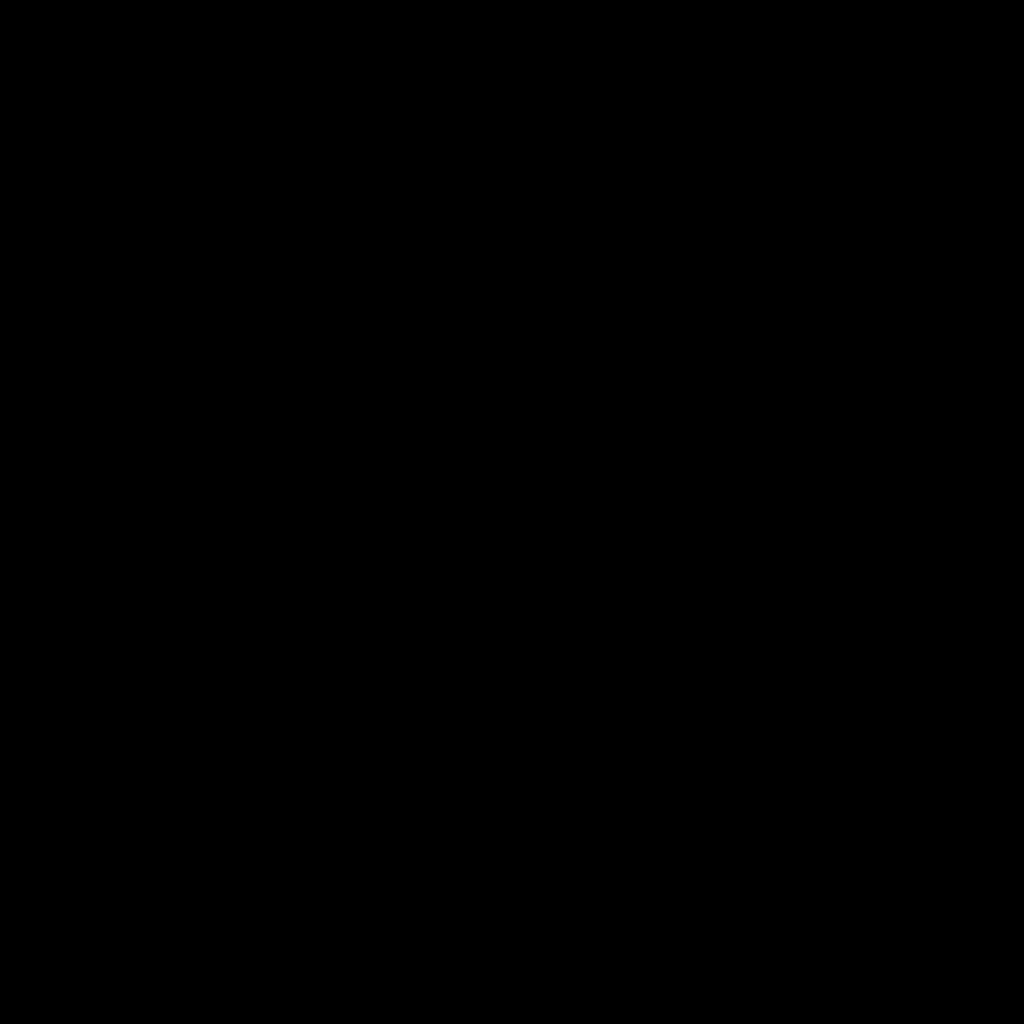

In [12]:
image = pipe("sks man riding a dolphin, oil painting, close up", negative_prompt="closed_eyes", num_inference_steps=50).images[0]
image

In [ ]:
image.save('last.jpg')

In [3]:
pipe.load_lora_weights?

Signature:
pipe.load_lora_weights(
    pretrained_model_name_or_path_or_dict: Union[str, Dict[str, torch.Tensor]],
    **kwargs,
)
Docstring:
Load LoRA weights specified in `pretrained_model_name_or_path_or_dict` into `self.unet` and
`self.text_encoder`.

All kwargs are forwarded to `self.lora_state_dict`.

See [`~loaders.LoraLoaderMixin.lora_state_dict`] for more details on how the state dict is loaded.

See [`~loaders.LoraLoaderMixin.load_lora_into_unet`] for more details on how the state dict is loaded into
`self.unet`.

See [`~loaders.LoraLoaderMixin.load_lora_into_text_encoder`] for more details on how the state dict is loaded
into `self.text_encoder`.

Parameters:
    pretrained_model_name_or_path_or_dict (`str` or `os.PathLike` or `dict`):
        See [`~loaders.LoraLoaderMixin.lora_state_dict`].
    kwargs (`dict`, *optional*):
        See [`~loaders.LoraLoaderMixin.lora_state_dict`].
File:      /workspace/sd-xl-experiments/lora/diffusers/src/diffusers/pipelines/stable_diffusio